<a href="https://colab.research.google.com/github/kidd000/Acerbi_Textbook/blob/main/acerbi_CH4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第3章では、ある文化的形質が他の形質よりも本質的にコピーされやすい場合について見てきました。ここでは、形質が同等であるにもかかわらず、個体は集団の特性、特に他の個体がすでにその形質を持っている場合に、ある形質を採用する可能性が高くなるという、他の種類の伝達バイアスについて見ていきます。先述したように、これらはしばしば「間接的」または「文脈」バイアスと呼ばれます）。


# **4.1   　同調伝達の論理**


第一の可能性として、集団内での形質の頻度、すなわち、他の個体がどれだけの数の形質をすでに持っているかに影響される可能性があります。同調（または「正の頻度依存バイアス」）が最も研究されています。ここでは、個体は、その固有の特徴に関係なく、集団の中で最も一般的な形質を採用する可能性が不釣り合いなほど高くなる。反対に、最も一般的でない形質がコピーされる可能性が高い場合、反同調または負の頻度依存バイアスも考えられる。これは実際の生活ではおそらくあまり一般的ではないが)。

例えば、母集団の中で形質Aの頻度が0.7で、残りの人が形質Bを持っているとするとします。偏りのない学習者は，0.7と全く等しい確率で形質Aを採用するだろう。これは偏りのない伝達であり，（第1章：前世代のメンバーをランダムに選ぶことであり、採用の確率は前世代の中でのその形質の頻度に等しい）で説明したモデルで起こることです。

一方、同調主義的な学習者は、0.7よりも大きな確率で形質Aを採用します。言い換えれば、普及している形質は、偏りのない伝達に比べて「採用ブースト」を受けることになります。普及していない形質は、それに相当する「採用ペナルティ」を受けます。このブーストやペナルティの大きさは、パラメータによって制御することができます。

我々のモデルでは、シンプルにしておきましょう。個人が母集団全体からサンプリングすると仮定するのではなく（大規模な母集団ではありえない）、3人だけのデモンストレータを無作為に選ぶと仮定してみましょう。なぜ3人なのか？これは、多数派（すなわち、2対1）を生み出すことができるデデモンストレータの最小数であり、同調を実装するために必要な数です。2人のデモンストレータが1つの形質を持っていて、もう1人のデモンストレータが別の形質を持っている場合、多数派の形質が採用される確率を高め、少数派の形質が採用される確率を下げたい。

（中略）

これらの前提条件を、これまで構築してきたような個人ベースのモデルに実装してみましょう。前述のように、N個の個体がそれぞれAかBの2つの形質のいずれかを持っていると仮定します。世代t =1におけるAの初期頻度はp0です。関数に直行するのではなく、一歩一歩進んでみましょう。

最初に、パラメータ N と p0 を以前と同様に指定し、さらに新しい同調パラメータ D を指定します。また、通常の母集団を作成し、p0 で指定された割合で A と B で満たします。





In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 各種設定
N = 100
p_0 = 0.5
D = 1
# 乱数種を設定
# np.random.seed(1)
# 文化形質を設定
cultural_trait = ["A","B"]

# 1世代目のpopulationを作る
population = list(np.random.choice(cultural_trait, size = N, p = [p_0, 1-p_0]))
# 1世代目のpopulationの中身を見てみる
# population

ここで、次の世代の新しい個体ごとに、現在の個体群から無作為に3人のデモンストレータを選ぶ、デモンストレータと呼ばれる別のデータフレームを作成します。したがって、3つの列/変数（それぞれのデモンストレータに1つずつ）、N個の行（各個人に1つずつ）が必要となります。各列をpopulationデータフレームからランダムに選ばれた形質で埋めます。

In [2]:
# デモンストレータのデータフレームを作る-1世代目のpopulationからランダムに3人ずつ選ぶ試行をN人分
demonstrators = pd.DataFrame(np.arange(N*3).reshape(N,3)).applymap(lambda x: np.random.choice(population))

# デモンストレータのデータフレームの中身を見てみる
demonstrators

,0,1,2
0,B,A,B
1,A,A,B
2,A,A,B
3,B,A,A
4,A,A,B
...,...,...,...
95,B,B,A
96,A,A,A
97,A,A,A
98,A,B,A


ここでは、各行が、それぞれの新しい次世代の個人によってランダムに選ばれた３つのデモンストレーターの文化形質が表されていると考えてください。ここでは、これら３人のデモンストレーターの文化形質の組み合わせについて、Ａを採用する確率を計算したいと思います。

まず、各組み合わせに含まれるAの数を求める。そして、表1の確率に基づいて母集団の形質を入れ替えます。3人中2人がAを持っている場合は確率2/3+D/3でAとし、そうでない場合はBとする。3人のうち1人がAを持っている場合は、1/3-D/3の確率でAとし、そうでない場合はBとする。



In [3]:
print("表1 3人のデモンストレータが持つ文化形質のそれぞれの組み合わせについて、形質Aを採用する確率")
Table = pd.DataFrame({"Demonstrator1":["A","A","A","B","A","B","B","B"], "Demonstrator2":["A","A","B","A","B","A","B","B"],"Demonstrator3":["A","B","A","A","B","B","A","B"], "Probability of adopting trait A":["1", "2/3+D/3","2/3+D/3","2/3+D/3","1/3-D/3","1/3-D/3","1/3-D/3","0"]})
Table

表1 3人のデモンストレータが持つ文化形質のそれぞれの組み合わせについて、形質Aを採用する確率


,Demonstrator1,Demonstrator2,Demonstrator3,Probability of adopting trait A
0,A,A,A,1
1,A,A,B,2/3+D/3
2,A,B,A,2/3+D/3
3,B,A,A,2/3+D/3
4,A,B,B,1/3-D/3
5,B,A,B,1/3-D/3
6,B,B,A,1/3-D/3
7,B,B,B,0


In [4]:
# それぞれの行の3人のデモンストレータの形質の組み合わせの内、Aの数を取得
demonstrators_bool = (demonstrators == "A")

num_As = pd.DataFrame.sum(demonstrators_bool, axis = 1)

num_As

0     1
1     2
2     2
3     2
4     2
     ..
95    1
96    3
97    3
98    2
99    2
Length: 100, dtype: int64

In [6]:
# 3人のデモンストレータの形質の組み合わせが全てAの場合、問答無用で次世代のpopulationはA
for i in range(100):
  if num_As[i] == 3:
    population[i] = "A"

# 3人のデモンストレータの形質の組み合わせが全てBの場合、問答無用で次世代のpopulationはB
for i in range(100):
  if num_As[i] == 0:
    population[i] = "B"

# Aが2人、Bが1人だった場合、Aになる確率のリスト
prob_majority = list(np.random.choice(["A", "B"], size=N, p=[(2/3+D/3), 1-(2/3+D/3)]))

# Aが2人、Bが1人だった場合、次世代のpopulationは、上のリストから
for i in range(100):
  if num_As[i] == 2:
    population[i] = prob_majority[i]

# Aが1人、Bが2人だった場合、Aになる確率のリスト
prob_minority = list(np.random.choice(["A", "B"], size=N, p=[(1/3-D/3), 1-(1/3-D/3)]))

# Aが1人、Bが2人だった場合、次世代のpopulationは、上のリストから
for i in range(100):
  if num_As[i] == 1:
    population[i] = prob_minority[i]


動作を確認するために、新しいpopulationデータフレームを列としてデモンストレータに追加して、それを見てみましょう。これにより、3人のデモンストレータとそれによって生まれた新しい形質を並べて見ることができます。

In [7]:
# 次世代の形質をnew_trait列と名付け、デモンストレータのデータフレームに追加
demonstrators["new_trait"] = population

demonstrators

,0,1,2,new_trait
0,B,A,B,B
1,A,A,B,A
2,A,A,B,A
3,B,A,A,A
4,A,A,B,A
...,...,...,...,...
95,B,B,A,B
96,A,A,A,A
97,A,A,A,A
98,A,B,A,A


上記のようにD=1としているので、新しい形質は常に3人のデモンストレーターの中で多数派の形質となります。これが完全な同調です。Dを減らすことで同調を弱めることができます。ここではD=0.5の例を示します。すべてのコードは、すでに上で説明したものと同じです。

In [8]:
D = 0.5

# 1世代目のpopulationを作る
population = list(np.random.choice(cultural_trait, size = N, p = [p_0, 1-p_0]))

# デモンストレータのデータフレームを作る-1世代目のpopulationからランダムに3人ずつ選ぶ試行をN人分
demonstrators = pd.DataFrame(np.arange(N*3).reshape(N,3)).applymap(lambda x: np.random.choice(population))

# それぞれの行の3人のデモンストレータの形質の組み合わせの内、Aの数を取得
demonstrators_bool = (demonstrators == "A")
num_As = pd.DataFrame.sum(demonstrators_bool, axis = 1)

# 3人のデモンストレータの形質の組み合わせが全てAの場合、問答無用で次世代のpopulationはA
for i in range(100):
  if num_As[i] == 3:
    population[i] = "A"

# 3人のデモンストレータの形質の組み合わせが全てBの場合、問答無用で次世代のpopulationはB
for i in range(100):
  if num_As[i] == 0:
    population[i] = "B"

# Aが2人、Bが1人だった場合、Aになる確率のリスト
prob_majority = list(np.random.choice(["A", "B"], size=N, p=[(2/3+D/3), 1-(2/3+D/3)]))

# Aが2人、Bが1人だった場合、次世代のpopulationは、上のリストから
for i in range(100):
  if num_As[i] == 2:
    population[i] = prob_majority[i]

# Aが1人、Bが2人だった場合、Aになる確率のリスト
prob_minority = list(np.random.choice(["A", "B"], size=N, p=[(1/3-D/3), 1-(1/3-D/3)]))

# Aが1人、Bが2人だった場合、次世代のpopulationは、上のリストから
for i in range(100):
  if num_As[i] == 1:
    population[i] = prob_minority[i]

# 次世代の形質をnew_trait列と名付け、デモンストレータのデータフレームに追加
demonstrators["new_trait"] = population

demonstrators

,0,1,2,new_trait
0,B,A,A,A
1,A,B,B,B
2,B,A,A,A
3,A,A,B,A
4,A,A,A,A
...,...,...,...,...
95,B,B,A,B
96,B,B,B,B
97,B,B,B,B
98,A,A,B,A


同調が弱くなった今、新しい形質は3人のデモンストレータの中で多数派ではないこともある。

# **4.2 　同調伝達の検証**

これまでの章と同様に、このコードをすべて関数にまとめて、複数世代にわたって、複数回の実行で何が起こるかを見ることができます。以下のコードに新しいものは何もありません。これはすでに書いたコード（第1章）と、上で紹介した同調のための新しいコードを組み合わせたものです。

In [9]:
def conformist_transmission(N, p_0, D, t_max, r_max):  # t_max：世代数　r_max：ラン数
  #アウトプット用のデータフレームを作成
  ##run列となるリスト
  run = np.repeat(range(1, r_max + 1), repeats=t_max, axis=0)
  
  ##generation列となるリスト
  generation = np.array(list(range(1, t_max + 1)) * r_max)

  ##p(Aの頻度)列となるリスト
  p = np.zeros(t_max * r_max)

  output = pd.DataFrame()
  output["run"] = run
  output["generation"] = generation
  output["p"] = p

  # 毎回このpandasデータフレームに値を代入していたら処理が重くなるので、numpy3次元アレーで代用
  p_array = np.zeros((r_max, t_max))

  # np.random.seed(1)

  for r in range(r_max):
      # 1世代目のpopulationを作る
      population = list(np.random.choice(cultural_trait, size=N, p=[p_0, 1 - p_0]))

      # 各ラン、初めの世代のpを埋める
      p_array[r, 0] = population.count("A")/N

      for t in range(1, t_max):
          # デモンストレータのデータフレームを作る-1世代目のpopulationからランダムに3人ずつ選ぶ試行をN人分
          demonstrators = pd.DataFrame(np.arange(N * 3).reshape(N, 3)).applymap(lambda x: np.random.choice(population))

          # それぞれの行の3人のデモンストレータの形質の組み合わせの内、Aの数を取得
          demonstrators_bool = (demonstrators == "A")
          num_As = pd.DataFrame.sum(demonstrators_bool, axis=1)

          # 3人のデモンストレータの形質の組み合わせが全てAの場合、問答無用で次世代のpopulationはA
          for i in range(N):
              if num_As[i] == 3:
                  population[i] = "A"

          # 3人のデモンストレータの形質の組み合わせが全てBの場合、問答無用で次世代のpopulationはB
          for i in range(N):
              if num_As[i] == 0:
                  population[i] = "B"

          # Aが2人、Bが1人だった場合、Aになる確率のリスト
          prob_majority = list(np.random.choice(["A", "B"], size=N, p=[(2 / 3 + D / 3), 1 - (2 / 3 + D / 3)]))

          # Aが2人、Bが1人だった場合、次世代のpopulationは、上のリストから
          for i in range(N):
              if num_As[i] == 2:
                  population[i] = prob_majority[i]

          # Aが1人、Bが2人だった場合、Aになる確率のリスト
          prob_minority = list(np.random.choice(["A", "B"], size=N, p=[(1 / 3 - D / 3), 1 - (1 / 3 - D / 3)]))

          # Aが1人、Bが2人だった場合、次世代のpopulationは、上のリストから
          for i in range(N):
              if num_As[i] == 1:
                  population[i] = prob_minority[i]

          p_array[r, t] = population.count("A") / N

  # numpy3次元アレーをpandasのデータフレームへとラン毎に代入
  output = output.assign(p = p_array.flatten())
  #結果（プロットするデータ）をリターン
  return output

In [20]:
# 結果をプロットするための関数を定義
import seaborn as sns

def plot_multiple_runs(data_model, t_max):
  # 体裁いじいじ
  sns.set_palette("hls",n_colors=24)
  sns.set('poster', 'whitegrid', 'dark', font_scale=1,
          rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
  
  # ランごとの平均値推移
  fig, ax = plt.subplots(figsize=(12, 8))
  sns.lineplot(x="generation", y="p", hue="run", data=data_model, legend = "full", palette="hls")

  # 全ランの平均値推移
  p_mean_list = []
  for g in range(1, t_max+1):
    p_mean_list.append(data_model[data_model.generation == g].p.mean())

  plt.plot(p_mean_list,marker="None",linestyle="-",linewidth=3.0,color="black")
  plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, title="run")
  plt.ylim(-0.1, 1.1)
  plt.xlabel("Generation")
  plt.ylabel("Frequency")
  plt.show()

In [11]:
data_model_D1 = conformist_transmission(N = 1000, p_0 = 0.5, D = 1, t_max = 50, r_max = 10)
data_model_D1

,run,generation,p
0,1,1,0.504
1,1,2,0.501
2,1,3,0.519
3,1,4,0.503
4,1,5,0.496
...,...,...,...
495,10,46,0.000
496,10,47,0.000
497,10,48,0.000
498,10,49,0.000


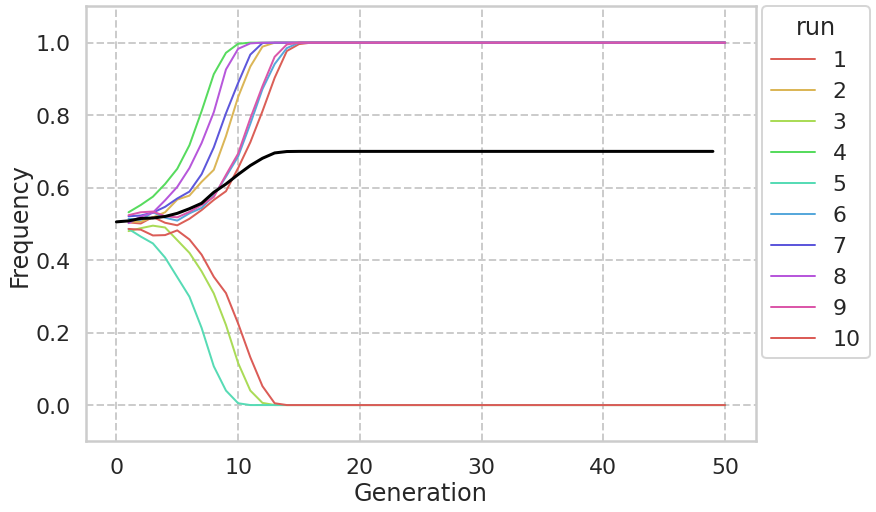

In [21]:
plot_multiple_runs(data_model_D1, t_max=50)

ここでは、いくつかの線がp=1になり、いくつかの線がp=0になるのがわかるはずです。これは，母集団におけるAの初期の頻度に依存します．p0=0.5としたときに、Aがわずかに多くなることもあれば、Bがわずかに多くなることもあります（我々のモデルでは、これはコインをひっくり返すような確率的なものなので、初期の頻度が正確に0.5になることはほとんどありません）。

D=0とするとどうなるでしょうか？

In [13]:
data_model_D0 = conformist_transmission(N = 1000, p_0 = 0.5, D = 0, t_max = 50, r_max = 10)

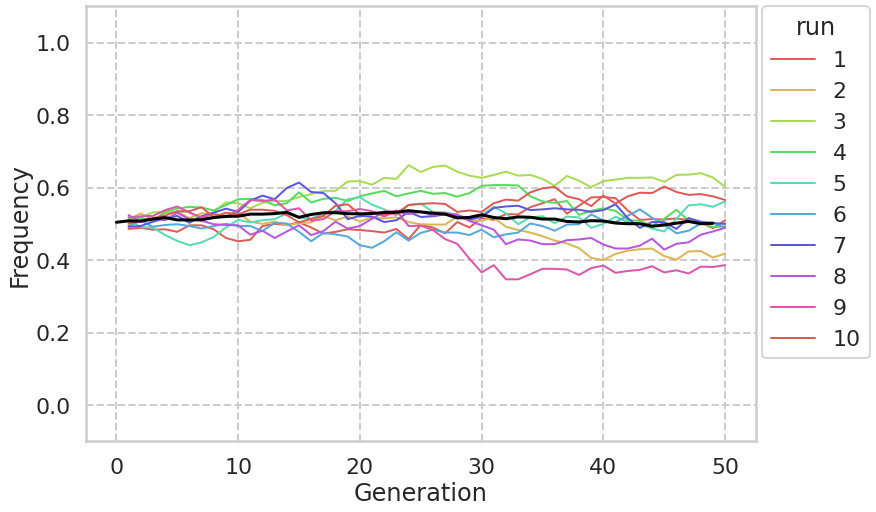

In [22]:
plot_multiple_runs(data_model_D0, t_max=50)

このモデルはバイアスのない（水平）伝達に相当する。第 1 章のシミュレーションでは，十分に大きな N で周波数が p=0.5 付近で変動している．これは同調の効果を強調しています。バイアスのない伝達では、多数派の形質が好まれるのは、その頻度に比例してコピーされるからです（ちなみに、「多数派をコピーする」というのは、文化進化の分野で使われている技術的な意味でのバイアスを表す良い表現ではないことは、このためです。しかし、少数の集団でしか固定されない。その代わり、同調では、多数派の形質はその頻度よりも高い確率でコピーされ、同調が形質をより一般的になるにつれて固定化へと駆り立てるのです。

余談ですが、最後の2つのグラフは、ほぼ同じ太い黒の平均頻度を持っており、p=0.5付近で推移していることに注意してください。これは、平均だけを見ることの危険性を浮き彫りにしています。もし、個々の実行をプロットせず、平均頻度だけに頼っていたら、D=0とD=1が同じ結果を与えたと思うかもしれません。しかし、実際には、それらは非常に異なっています。常に平均を生成するメカニズムとなっている分布を見てください。

次に、p0を変化させて初期の頻度を変化させ、同調を再び追加した場合の効果を探ってみましょう。

In [15]:
data_model_P55 = conformist_transmission(N = 1000, p_0 = 0.55, D = 1, t_max = 50, r_max = 10)

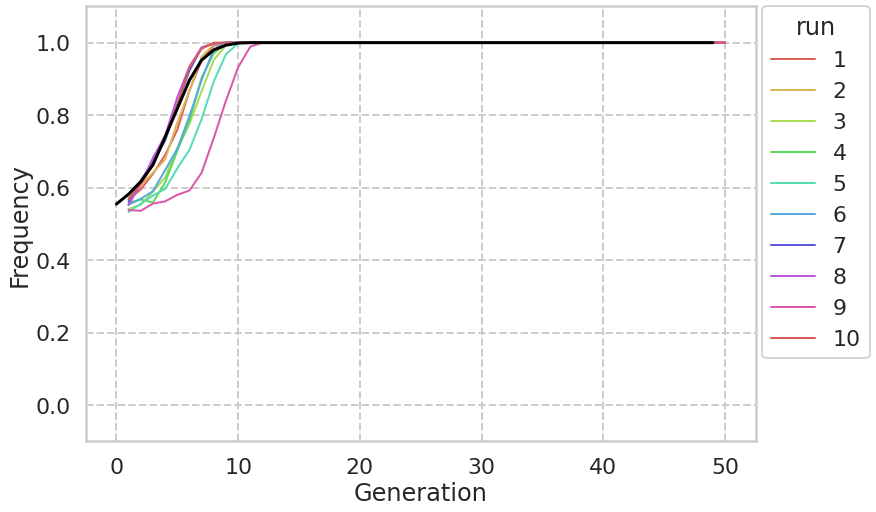

In [23]:
plot_multiple_runs(data_model_P55, t_max=50)

Aがわずかに多数派 (p0 = 0.55) で始まる場合、すべての(またはほとんどすべての)ランでAが固定化されます。ここで、逆を試してみましょう。

In [24]:
data_model_P45 = conformist_transmission(N = 1000, p_0 = 0.45, D = 1, t_max = 50, r_max = 10)

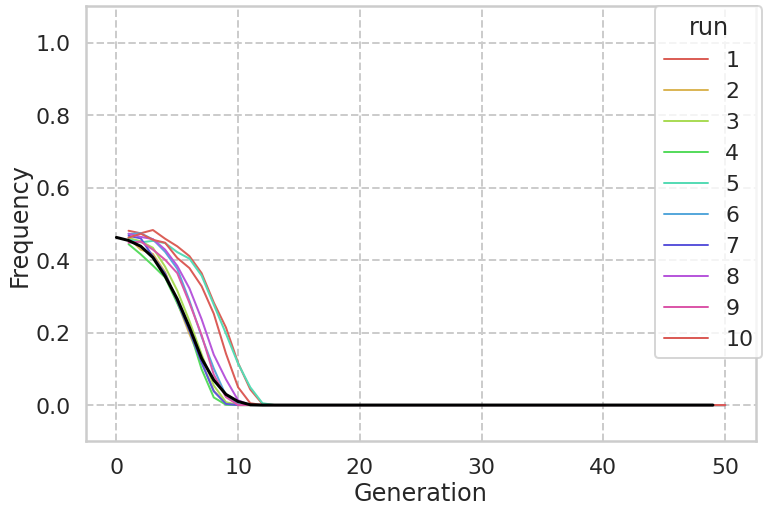

In [25]:
plot_multiple_runs(data_model_P45, t_max=50)

Aが少数派 (p0 = 0.45) でスタートすると、すべての(またはほぼすべての)ランでAが消滅します。これらの最後の2つのグラフは、初期条件が同調にどのように影響するかを示しています。どちらの形質がより一般的であるかは、同調伝達に有利である。

# **4.3 　 モデルのまとめ**

この章では、同調バイアスの文化伝達を扱った。これは、個人がデモンストレータの集合の中で最も一般的な形質を採用する可能性がデモンストレータの頻度よりも高い場合である。この間接的なバイアスを、[第3章][偏った伝達（直接的なバイアス）]の直接（または内容）バイアス伝達と対比させることができ、ある形質が本質的にコピーされる可能性が高くなります。同調では、形質の魅力に本質的な違いはなく、単に普及しているという理由だけで優先的にコピーされます。

我々は、同調がより多い形質の頻度を増加させることを見てきた。ここで重要なのは、初期の形質の頻度です：初期条件で一般的な形質は固定化されやすい。これにより、確率性が重要になる。つまり、小さなpopulationでは初期頻度に差が生じやすい。

また、バイアスのないコピーと同調の間の微妙ではあるが基本的な違いについても議論しました。どちらも多数派の形質が好まれますが、不釣り合いに（頻度よりも高い確率で）好まれるのは同調の場合だけです。大規模populationでは、バイアスのない伝達が形質の固定化につながることはほとんどありませんが、同調のある伝達はしばしばそうなります。さらに、後述するように、同調はまた、技術革新や移住による他の形質の導入などの外部からの刺激（external disturbances）に対して、多数派の形質を抵抗力のあるものにする。

# **4.4 　 さらに学びたい人のために**

Boyd and Richerson (1985)は、ここで定義されているように、同調または正の頻度依存文化伝達を導入し、同様の方法で分析的にモデル化した。Henrich and Boyd (1998)は同調伝達の進化をモデル化し、一方、Effersonら(2008)は単純な学習課題において少なくとも一部の人が同調傾向を持つという実験的証拠を提供した。